In [1]:
from __future__ import division
import argparse
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn.apionly as sns

from sklearn.metrics import accuracy_score
from sklearn.model_selection import validation_curve, GridSearchCV, cross_val_score, ParameterGrid
from sklearn.neighbors import KNeighborsClassifier

from load_sim import load_sim
from preprocessing import get_train_test_sets
from features import get_training_features
from pipelines import get_pipeline
import plotting_functions as plotting
import data_functions as data_functions

%matplotlib inline

In [2]:
sns.set_palette('muted')
sns.set_color_codes()

In [3]:
df, cut_dict = load_sim(return_cut_dict=True)
selection_mask = np.array([True] * len(df))
standard_cut_keys = ['reco_exists', 'reco_zenith', 'num_hits', 'IT_signal',
                     'StationDensity', 'max_charge_frac', 'reco_containment',
                     'energy_range']
for key in standard_cut_keys:
    selection_mask *= cut_dict[key]

df = df[selection_mask]

feature_lists = [['reco_log_energy', 'InIce_log_charge', 'reco_cos_zenith', 'lap_chi2', 'NChannels'],
                ['reco_log_energy', 'InIce_log_charge_threequarter', 'reco_cos_zenith', 'lap_chi2', 'NChannels_threequarter'],
                ['reco_log_energy', 'InIce_log_charge_half', 'reco_cos_zenith', 'lap_chi2', 'NChannels_half'],
                ['reco_log_energy', 'InIce_log_charge_quarter', 'reco_cos_zenith', 'lap_chi2', 'NChannels_quarter']]
feature_labels = np.array(['$\\log_{10}({\mathrm{E/GeV})$', 'InIce charge', '$\cos(\\theta)$',
              '$\mathrm{Laputop}\ \chi^2/\mathrm{n.d.f.}$','NChannels'])
label_list = ['Full detector', 'Top 75\%', 'Top 50\%', 'Top 25\%']

load_sim.py:70: RuntimeWarning: divide by zero encountered in log10
  df['reco_log_energy'] = np.nan_to_num(np.log10(df['reco_energy']))


number training events = 36125
Fitting 5 folds for each of 19 candidates, totalling 95 fits


[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    8.4s
[Parallel(n_jobs=10)]: Done  95 out of  95 | elapsed:   44.8s finished


best GS CV score = 0.792055363322
best GS CV depths = {'classifier__max_depth': 15}
Grid scores on development set:
0.699 (+/-0.007) for {'classifier__max_depth': 1}
0.716 (+/-0.010) for {'classifier__max_depth': 2}
0.723 (+/-0.006) for {'classifier__max_depth': 3}
0.731 (+/-0.004) for {'classifier__max_depth': 4}
0.746 (+/-0.007) for {'classifier__max_depth': 5}
0.759 (+/-0.008) for {'classifier__max_depth': 6}
0.773 (+/-0.010) for {'classifier__max_depth': 7}
0.781 (+/-0.009) for {'classifier__max_depth': 8}
0.786 (+/-0.011) for {'classifier__max_depth': 9}
0.789 (+/-0.011) for {'classifier__max_depth': 10}
0.791 (+/-0.011) for {'classifier__max_depth': 11}
0.791 (+/-0.014) for {'classifier__max_depth': 12}
0.792 (+/-0.012) for {'classifier__max_depth': 13}
0.792 (+/-0.012) for {'classifier__max_depth': 14}
0.792 (+/-0.013) for {'classifier__max_depth': 15}
0.791 (+/-0.015) for {'classifier__max_depth': 16}
0.790 (+/-0.013) for {'classifier__max_depth': 17}
0.791 (+/-0.012) for {'cla

[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    9.3s
[Parallel(n_jobs=10)]: Done  95 out of  95 | elapsed:   44.3s finished


best GS CV score = 0.793134948097
best GS CV depths = {'classifier__max_depth': 14}
Grid scores on development set:
0.704 (+/-0.004) for {'classifier__max_depth': 1}
0.718 (+/-0.006) for {'classifier__max_depth': 2}
0.726 (+/-0.005) for {'classifier__max_depth': 3}
0.734 (+/-0.005) for {'classifier__max_depth': 4}
0.750 (+/-0.010) for {'classifier__max_depth': 5}
0.763 (+/-0.007) for {'classifier__max_depth': 6}
0.775 (+/-0.007) for {'classifier__max_depth': 7}
0.782 (+/-0.007) for {'classifier__max_depth': 8}
0.789 (+/-0.008) for {'classifier__max_depth': 9}
0.791 (+/-0.007) for {'classifier__max_depth': 10}
0.791 (+/-0.009) for {'classifier__max_depth': 11}
0.792 (+/-0.009) for {'classifier__max_depth': 12}
0.792 (+/-0.011) for {'classifier__max_depth': 13}
0.793 (+/-0.012) for {'classifier__max_depth': 14}
0.792 (+/-0.010) for {'classifier__max_depth': 15}
0.791 (+/-0.011) for {'classifier__max_depth': 16}
0.790 (+/-0.010) for {'classifier__max_depth': 17}
0.790 (+/-0.012) for {'cla

[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:   10.0s
[Parallel(n_jobs=10)]: Done  95 out of  95 | elapsed:   44.7s finished


best GS CV score = 0.801467128028
best GS CV depths = {'classifier__max_depth': 12}
Grid scores on development set:
0.700 (+/-0.038) for {'classifier__max_depth': 1}
0.722 (+/-0.007) for {'classifier__max_depth': 2}
0.732 (+/-0.007) for {'classifier__max_depth': 3}
0.742 (+/-0.007) for {'classifier__max_depth': 4}
0.760 (+/-0.007) for {'classifier__max_depth': 5}
0.772 (+/-0.008) for {'classifier__max_depth': 6}
0.786 (+/-0.007) for {'classifier__max_depth': 7}
0.792 (+/-0.006) for {'classifier__max_depth': 8}
0.795 (+/-0.006) for {'classifier__max_depth': 9}
0.797 (+/-0.012) for {'classifier__max_depth': 10}
0.800 (+/-0.011) for {'classifier__max_depth': 11}
0.801 (+/-0.010) for {'classifier__max_depth': 12}
0.800 (+/-0.008) for {'classifier__max_depth': 13}
0.800 (+/-0.012) for {'classifier__max_depth': 14}
0.801 (+/-0.011) for {'classifier__max_depth': 15}
0.800 (+/-0.013) for {'classifier__max_depth': 16}
0.800 (+/-0.011) for {'classifier__max_depth': 17}
0.798 (+/-0.012) for {'cla

[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    9.1s
[Parallel(n_jobs=10)]: Done  95 out of  95 | elapsed:   45.5s finished


best GS CV score = 0.810408304498
best GS CV depths = {'classifier__max_depth': 13}
Grid scores on development set:
0.659 (+/-0.008) for {'classifier__max_depth': 1}
0.729 (+/-0.006) for {'classifier__max_depth': 2}
0.743 (+/-0.007) for {'classifier__max_depth': 3}
0.750 (+/-0.003) for {'classifier__max_depth': 4}
0.767 (+/-0.007) for {'classifier__max_depth': 5}
0.783 (+/-0.007) for {'classifier__max_depth': 6}
0.792 (+/-0.005) for {'classifier__max_depth': 7}
0.797 (+/-0.008) for {'classifier__max_depth': 8}
0.803 (+/-0.007) for {'classifier__max_depth': 9}
0.806 (+/-0.007) for {'classifier__max_depth': 10}
0.808 (+/-0.004) for {'classifier__max_depth': 11}
0.808 (+/-0.005) for {'classifier__max_depth': 12}
0.810 (+/-0.004) for {'classifier__max_depth': 13}
0.807 (+/-0.005) for {'classifier__max_depth': 14}
0.808 (+/-0.005) for {'classifier__max_depth': 15}
0.808 (+/-0.004) for {'classifier__max_depth': 16}
0.807 (+/-0.007) for {'classifier__max_depth': 17}
0.809 (+/-0.008) for {'cla

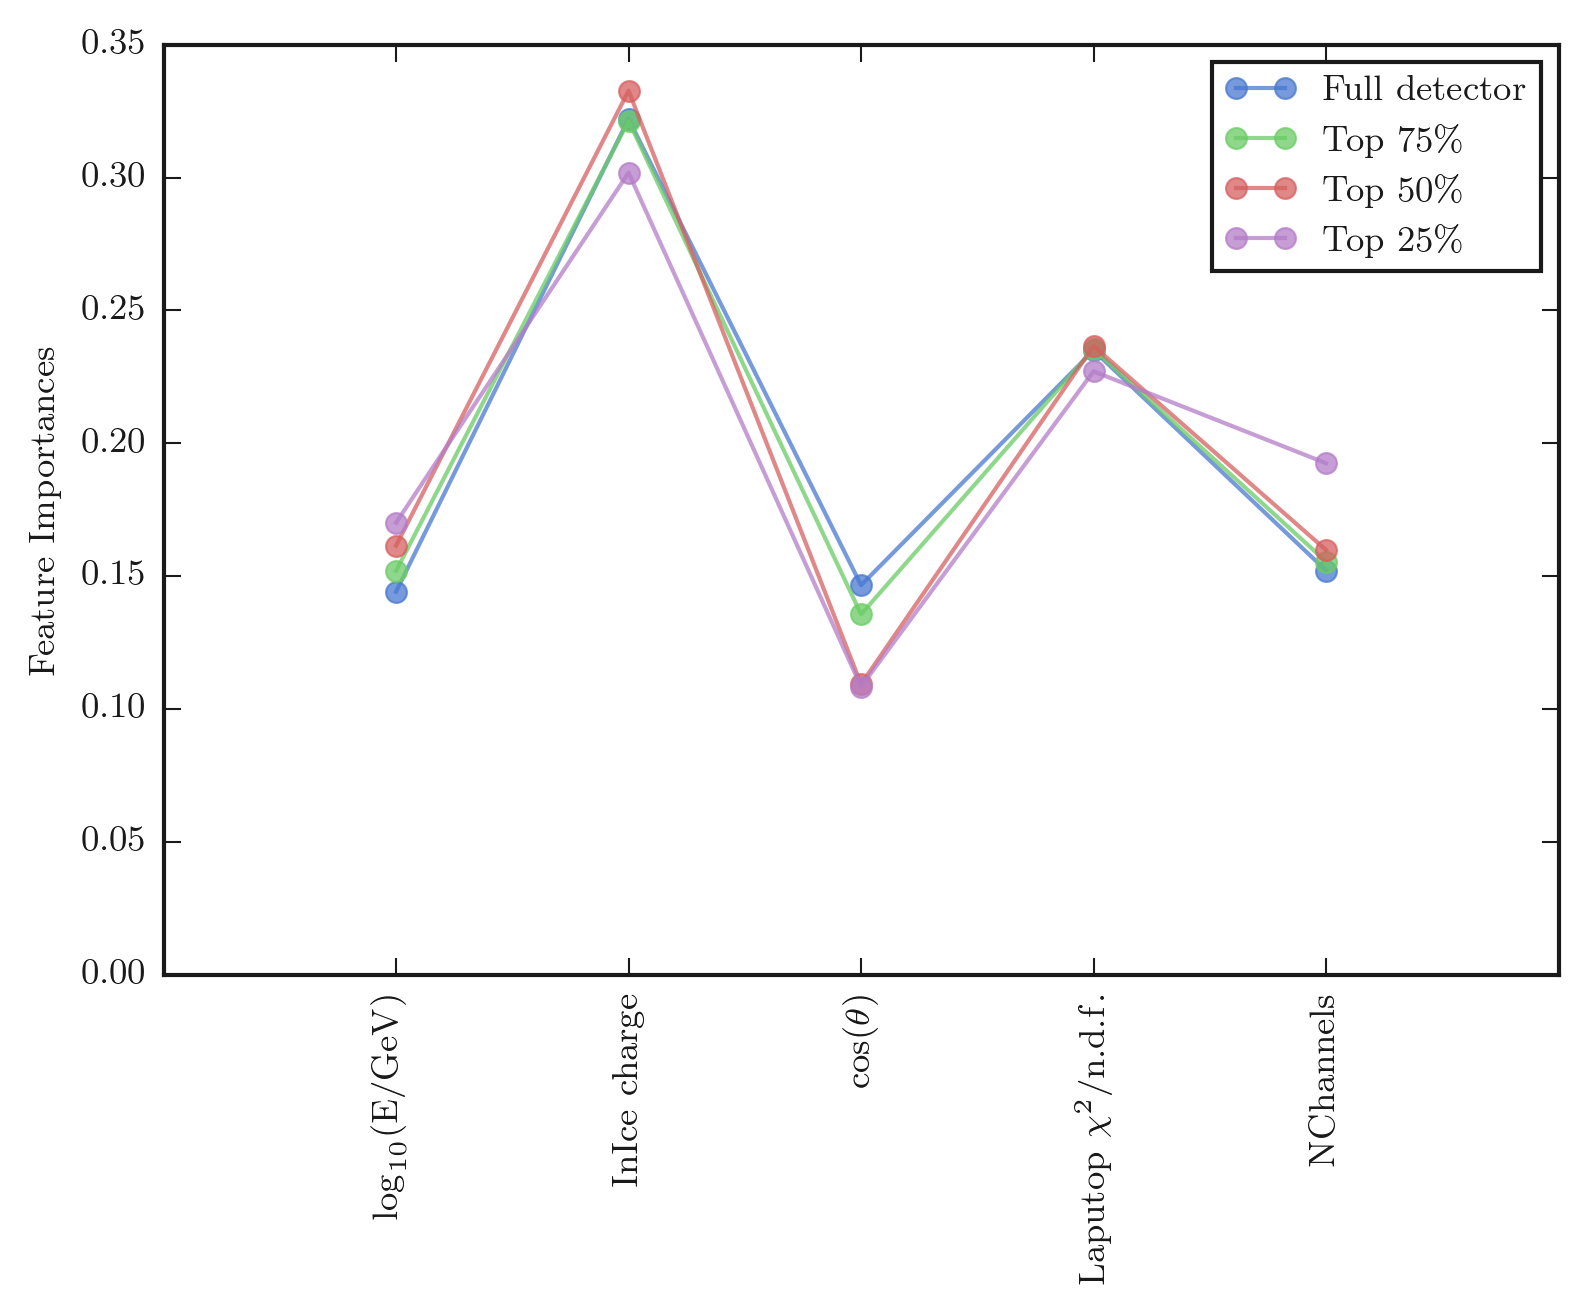

In [9]:
fig, ax = plt.subplots()
for feature_list, label in zip(feature_lists, label_list):
    X_train, X_test, y_train, y_test, le = get_train_test_sets(df, feature_list)

    print('number training events = ' + str(y_train.shape[0]))
    pipeline = get_pipeline('RF')
    param_range = np.arange(1, 20)
    param_grid = {'classifier__max_depth': param_range}
    gs = GridSearchCV(estimator=pipeline,
                      param_grid=param_grid,
                      scoring='accuracy',
                      cv=5,
                      verbose=1,
                      n_jobs=10)
    gs = gs.fit(X_train, y_train)
    print('best GS CV score = {}'.format(gs.best_score_))
    print('best GS CV depths = {}'.format(gs.best_params_))
    print('Grid scores on development set:')
    means = gs.cv_results_['mean_test_score']
    stds = gs.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, gs.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    pipeline.set_params(**gs.best_params_)
    pipeline.fit(X_train, y_train)
    scaler = pipeline.named_steps['scaler']
    clf = pipeline.named_steps['classifier']
    # Plot fraction of events vs energy
    num_features = len(feature_list)
    importances = pipeline.named_steps['classifier'].feature_importances_
#     indices = np.argsort(importances)[::-1]

#     for f in range(num_features):
#         print('{}) {}'.format(f + 1, importances[indices[f]]))

    ax.set_ylabel('Feature Importances')
    ax.plot(range(num_features),
            importances, linestyle='-', label=label, alpha=0.75)

    plt.xticks(range(num_features),
               feature_labels, rotation=90)
    ax.set_xlim([-1, len(feature_list)])
    ax.set_ylim([0, .35])
plt.legend()
plt.show()